# CS 221 Project - Text Features
Extracting the pertinent text features from the dataset to be used for classifying text.

## Libraries
Using NLTK for NLP-related parts.

In [10]:
import math
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import numpy as np
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joeyghuman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading in Data
Using the data from `final_data.csv`, which is generated from `histogram.ipynb`.

In [11]:
main_df = pd.read_csv('../data/final_data.csv')

## Features 1 and 2: Lexical Diversity and Length
Calculating the lexical diversity of each document, which we define as: $\frac{\text{number of unique words}}{\text{number of total words}}$. In addition, we define the number of words (we will eventually update to modeling against a distribution).

In [12]:
# Saving lengths
lengths = []

# Iterate each row in the dataframe
for index, row in main_df.iterrows():
    # Calculate lexical diversity
    words = word_tokenize(main_df.at[index, 'transcript'])
    lexical_div = float((len(set(words))) / len(words))
    
    # Set appropriate columns equal
    main_df.at[index, 'length'] = len(words)
    lengths.append(len(words))
    main_df.at[index, 'diversity'] = lexical_div

### Visualizing Histogram of Lengths
Using a histogram to visualize the lengths of the transcripts, which can be used to create a distribution for them.

(array([ 21.,  27.,  68.,  96., 124., 126., 117., 109., 182., 164., 172.,
        155., 166., 187., 136., 156., 130., 107.,  68.,  46.,  42.,  22.,
         10.,   4.,   6.,   3.,   4.,   2.,   5.,   0.,   2.,   2.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([6.000000e+00, 2.190200e+02, 4.320400e+02, 6.450600e+02,
        8.580800e+02, 1.071100e+03, 1.284120e+03, 1.497140e+03,
        1.710160e+03, 1.923180e+03, 2.136200e+03, 2.349220e+03,
        2.562240e+03, 2.775260e+03, 2.988280e+03, 3.201300e+03,
        3.414320e+03, 3.627340e+03, 3.840360e+03, 4.053380e+03,
        4.266400e+03, 4.479420e+03, 4.692440e+03, 4.905460e+03,
        5.118480e+03, 5.331500e+03, 5.544520e+03, 5.757540e+03,
        5.970560e+03, 6.183580e+03, 6.396600e+03, 6.609620e+03,
        6.822640e+03, 7.035660e+03, 7.248680e+03, 7.461700e+03,
        7.674720e+03, 7.887740e+03, 8.100760e+03, 8.313780e+03,
        8.526800e+

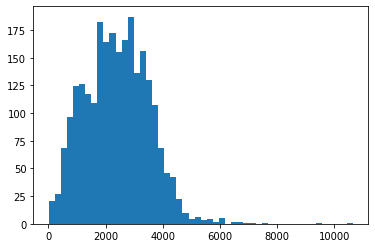

In [13]:
plt.hist(lengths, bins=50)

## Feature 3: Frequency Distribution of Common Words
Look at the frequency of each word (we will collate all of the texts into one document and eventually compare it to the average, later).

In [5]:
# Frequency distributions
freq_dists = []
key_words = []

# Setting the column for frequency distribution
for index, row in main_df.iterrows():
    # Calculate frequency distribution and set it equal
    words = word_tokenize(main_df.at[index, 'transcript'])
    freq_dist = nltk.FreqDist(words)
    freq_dists.append(freq_dist)
    keys = freq_dist.keys()

## Feature 4: Identifying Key Words
Note: we could potentially use the top-$n$ words from the frequncy distribution as our ''keywords'', since they are by far the most common? Just a thought!

In [14]:
# Presumably use freq_dists from above!

average word lengths

[ -472467.89318305  3350484.31278461 -3465769.83555171]
the minimum predicted virality 165777.19460006058
the maximum predicted virality 2473672.8330129664


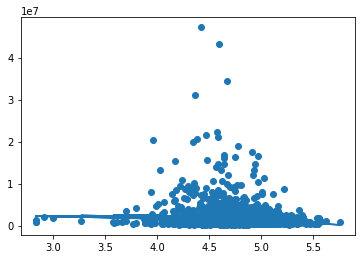

In [15]:
final_df = pd.read_csv('../data/final_data.csv')

#datalength = np.array([len(x.split(" ")) for x in final_df['transcript']])
datalength = []
for x in final_df['transcript']:
    summer = 0
    tokenized = word_tokenize(x)
    for y in x:
        summer += len(y)
    datalength.append(summer / len(tokenized))
datalength = np.array(datalength)
dataViews = final_df['views']


plt.scatter(datalength, dataViews)

polyFitter = np.polyfit(datalength,dataViews, 2)
print(polyFitter)

plt.plot(datalength, polyFitter[0] * (datalength ** 2) + polyFitter[1] * datalength + polyFitter[2])

print("the minimum predicted virality", min(polyFitter[0] * (datalength ** 2) + polyFitter[1] * datalength + polyFitter[2]))
print("the maximum predicted virality", max(polyFitter[0] * (datalength ** 2) + polyFitter[1] * datalength + polyFitter[2]))

viralityByLength = [polyFitter[0] * (x ** 2) + polyFitter[1] * x + polyFitter[2] for x in datalength]
